# Data Analysis Project

In [110]:
# Importing packages
import pandas as pd # Data structure and analysis package
import numpy as np # Computing package
import seaborn as sns # Additional graphs and layout
import matplotlib.pyplot as plt # Plots
import pydst # Statistics Denmark (DST)
from datetime import datetime # Formating dates
import ipywidgets as widgets # interactive plots

In [111]:
Dst = pydst.Dst(lang='en') # Set language to English

In [112]:
Dst.get_subjects() # Get overview of Statistics Denmark's subjects

,active,desc,hasSubjects,id
0,True,Population and elections,True,02
1,True,Living conditions,True,05
2,True,Education and knowledge,True,03
3,True,Culture and National Church,True,18
4,True,"Labour, income and wealth",True,04
5,True,Prices and consumption,True,06
6,True,National accounts and government finances,True,14
7,True,Money and credit market,True,16
8,True,External economy,True,13
9,True,Business sector in general,True,07


In our future analysis we drill down into Denmark's current account which is found in Statistics Denmark's table 'BB1S'. 

In [103]:
Var = Dst.get_variables(table_id = 'BB1S')

Before going into a deeper analysis, we would like to get an overview of the data.

In [104]:
Var[:]

,elimination,id,text,time,values
0,True,POST,items,False,"[{'id': '1.A.A', 'text': 'GOODS (FOB)'}, {'id'..."
1,False,INDUDBOP,receipts/expenditure,False,"[{'id': 'K', 'text': 'Current receipts'}, {'id..."
2,False,SÆSON,seasonal adjustment,False,"[{'id': '1', 'text': 'Non-seasonally adjusted'..."
3,True,LAND,country,False,"[{'id': 'W1', 'text': 'REST OF THE WORLD'}, {'..."
4,False,Tid,time,True,"[{'id': '2005M01', 'text': '2005M01'}, {'id': ..."


For future analysis we look deeper into the acronyms by changing the index.

In [105]:
Var['values'][3][:10]

[{'id': 'W1', 'text': 'REST OF THE WORLD'},
 {'id': 'B5', 'text': 'EU-28'},
 {'id': 'D5', 'text': 'Extra EU-28'}]

First we choose to look at the following dataframe, df1.

In [106]:
df1= Dst.get_data(table_id = 'BB1S', variables={'TID':['*'], 
                                               'SÆSON':['2'], 'LAND':['*'], 'POST':['*'], 'INDUDBOP':['N']})
df1.head(5)

,TID,SÆSON,LAND,POST,INDUDBOP,INDHOLD
0,2007M05,Seasonally adjusted,EU-28,PRIMARY INCOME,Net receipts,-1.5
1,2007M05,Seasonally adjusted,Extra EU-28,PRIMARY INCOME,Net receipts,2.3
2,2007M05,Seasonally adjusted,REST OF THE WORLD,PRIMARY INCOME,Net receipts,0.8
3,2007M05,Seasonally adjusted,EU-28,SECONDARY INCOME,Net receipts,-1.5
4,2007M05,Seasonally adjusted,Extra EU-28,SECONDARY INCOME,Net receipts,-1.5


We notice that the dataframe, df1, is not sorted in accordance to dates as the dataset starts in 2005. To get an overview of the dataframe we group by accounts and geographical area.

In [35]:
df1.sort_values(['TID'], inplace=True)
df1.groupby(['POST','LAND']).describe()

INDHOLD                                  \
                                     count       mean       std   min  25%   
POST             LAND                                                        
CURRENT ACCOUNT  EU-28               169.0  -2.561538  2.229910 -14.3 -4.0   
                 Extra EU-28         169.0  12.050888  4.758403   0.5  7.7   
                 REST OF THE WORLD   169.0   9.489941  4.797664  -1.6  5.6   
GOODS (FOB)      EU-28               169.0   1.031361  1.766055 -10.5  0.0   
                 Extra EU-28         169.0   5.506509  3.351388  -0.5  2.6   
                 REST OF THE WORLD   169.0   6.529586  3.387083  -2.2  4.0   
PRIMARY INCOME   EU-28               169.0  -0.899408  1.270053  -4.2 -1.9   
                 Extra EU-28         169.0   4.095858  1.637701  -5.4  3.3   
                 REST OF THE WORLD   169.0   3.197633  2.001635  -4.5  1.6   
SECONDARY INCOME EU-28               169.0  -1.382249  0.343015  -2.3 -1.6   
                 Extra EU-28         169.0  -1.448521  0.279265  -2.1 -1.6   
                 REST OF THE WORLD   169.0  -2.820710  0.396394  -3.8 -3.1   
SERVICES         EU-28               169.0  -1.308876  1.076858  -4.6 -1.9   
                 Extra EU-28         169.0   3.898817  1.356948  -1.9  3.2   
                 REST OF THE WORLD   169.0   2.581065  1.551649  -4.0  1.9   

                                                      
                                     50%   75%   max  
POST             LAND                                 
CURRENT ACCOUNT  EU-28              -2.8  -1.2   2.8  
                 Extra EU-28        13.0  15.6  26.2  
                 REST OF THE WORLD  10.1  13.1  21.5  
GOODS (FOB)      EU-28               1.0   2.4   4.5  
                 Extra EU-28         5.1   8.0  13.4  
                 REST OF THE WORLD   6.8   8.7  15.3  
PRIMARY INCOME   EU-28              -0.9   0.1   2.5  
                 Extra EU-28         4.4   5.3   6.7  
                 REST OF THE WORLD   3.2   4.8   8.3  
SECONDARY INCOME EU-28              -1.4  -1.2  -0.4  
                 Extra EU-28        -1.5  -1.3  -0.7  
                 REST OF THE WORLD  -2.9  -2.6  -1.3  
SERVICES         EU-28              -1.2  -0.7   1.4  
                 Extra EU-28         4.0   4.7  12.2  
                 REST OF THE WORLD   2.7   3.5   9.8

We notice that the current account is overall positive, but negative within the EU-28. Specifically, Denmark has a deficit in regards to services, primary and secondary income when trading with the other EU member states (EU-28).

Moving on, we are only interested in the current account to the whole world (rest of the world). Therefore, we specify 'Land'='W1'.

In [113]:
df= Dst.get_data(table_id = 'BB1S', variables={'TID':['*'], 
                                               'SÆSON':['2'], 'LAND':['W1'], 'POST':['*'], 'INDUDBOP':['N']})
df.sort_values(['TID'], inplace=True)
df.head(5)

,TID,SÆSON,LAND,POST,INDUDBOP,INDHOLD
174,2005M01,Seasonally adjusted,REST OF THE WORLD,PRIMARY INCOME,Net receipts,0.6
173,2005M01,Seasonally adjusted,REST OF THE WORLD,SERVICES,Net receipts,2.1
175,2005M01,Seasonally adjusted,REST OF THE WORLD,SECONDARY INCOME,Net receipts,-2.2
172,2005M01,Seasonally adjusted,REST OF THE WORLD,GOODS (FOB),Net receipts,5.8
171,2005M01,Seasonally adjusted,REST OF THE WORLD,CURRENT ACCOUNT,Net receipts,6.3


The dataframe looks nice, but in order to plot the accounts we need to format our time column accordingly. Further, "REST OF THE WORLD" does not seem to be an appropriate name for the whole world. Therefore, we change the name to the "Whole world".

In [114]:
df['LAND'] = df['LAND'].str.replace('REST OF THE WORLD', 'Whole world')
df['TID'] = df['TID'].str.replace('M', '-')
df['TID'] = pd.to_datetime(df['TID'])
df.head(5)

,TID,SÆSON,LAND,POST,INDUDBOP,INDHOLD
174,2005-01-01,Seasonally adjusted,Whole world,PRIMARY INCOME,Net receipts,0.6
173,2005-01-01,Seasonally adjusted,Whole world,SERVICES,Net receipts,2.1
175,2005-01-01,Seasonally adjusted,Whole world,SECONDARY INCOME,Net receipts,-2.2
172,2005-01-01,Seasonally adjusted,Whole world,GOODS (FOB),Net receipts,5.8
171,2005-01-01,Seasonally adjusted,Whole world,CURRENT ACCOUNT,Net receipts,6.3


We define our accounts.

In [21]:
PI  = df.loc[df['POST'] == 'PRIMARY INCOME', :]
S   = df.loc[df['POST'] == 'SERVICES', :]
SI  = df.loc[df['POST'] == 'SECONDARY INCOME', :]
G   = df.loc[df['POST'] == 'GOODS (FOB)', :]
CA  = df.loc[df['POST'] == 'CURRENT ACCOUNT', :]

To analyse deeper we plot our accounts. 

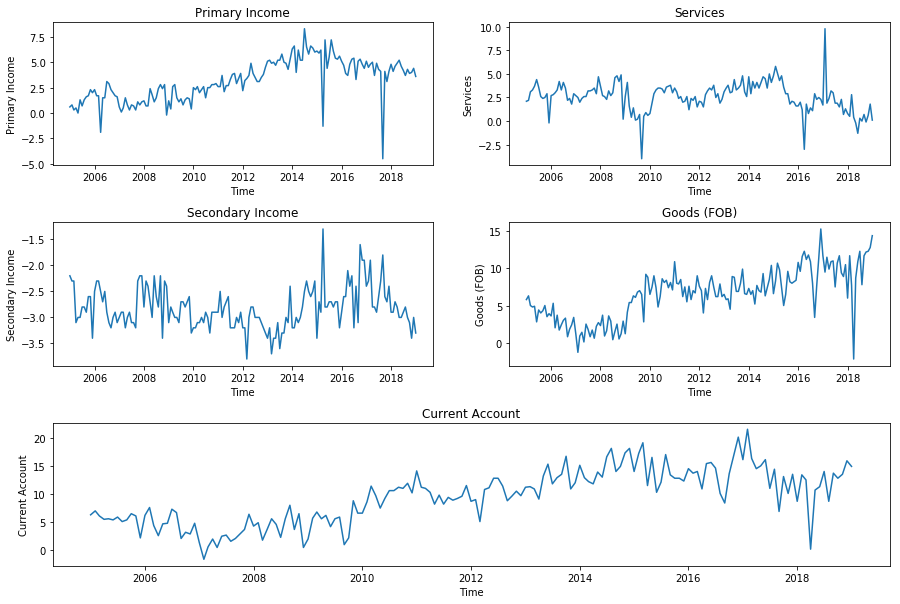

In [22]:
# plt.style.use('seaborn')
fig, axs = plt.subplots(3,2,figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)



plt.subplot(3, 2, 1)
plt.plot(PI['TID'],PI['INDHOLD'])
plt.xlabel('Time')
plt.ylabel('Primary Income')
plt.title('Primary Income')

plt.subplot(3, 2, 2)
plt.plot(S['TID'],S['INDHOLD'])
plt.xlabel('Time')
plt.ylabel('Services')
plt.title('Services')

plt.subplot(3, 2, 3)
plt.plot(SI['TID'],SI['INDHOLD'])
plt.xlabel('Time')
plt.ylabel('Secondary Income')
plt.title('Secondary Income')

plt.subplot(3, 2, 4)
plt.plot(G['TID'],G['INDHOLD'])
plt.xlabel('Time')
plt.ylabel('Goods (FOB)')
plt.title('Goods (FOB)')


plt.subplot(3, 1, 3)
plt.plot(CA['TID'],CA['INDHOLD'])
plt.xlabel('Time')
plt.ylabel('Current Account')
plt.title('Current Account')



plt.savefig('Historical plot', bbox_inches='tight')

In general this is in line with our previous findings. However, as the vertical axis change between figures it is difficult to compare the accounts. In order to solve this problem, we make an interactive plot displaying all accounts in one graph.

In [117]:
def myplot_1(services, secondary_income, goods, primary_income):
    if (services==1 and secondary_income==1 and goods==1 and primary_income==1): #alle fem
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plot2 = plt.plot(PI['TID'], S['INDHOLD'], 'b', label='Services')
        plot3 = plt.plot(PI['TID'], SI['INDHOLD'], 'g', label='Secondary income')
        plot4 = plt.plot(PI['TID'], G['INDHOLD'], 'y', label='Goods')
        plot5 = plt.plot(PI['TID'], PI['INDHOLD'], 'r', label='Primary income')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
    elif (services==1 and secondary_income==1 and goods==1): #nu til 4'erne
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plot2 = plt.plot(PI['TID'], S['INDHOLD'], 'b', label='Services')
        plot3 = plt.plot(PI['TID'], SI['INDHOLD'], 'g', label='Secondary income')
        plot4 = plt.plot(PI['TID'], G['INDHOLD'], 'y', label='Goods')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
    elif (services==1 and secondary_income==1 and primary_income==1):
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plot2 = plt.plot(PI['TID'], S['INDHOLD'], 'b', label='Services')
        plot3 = plt.plot(PI['TID'], SI['INDHOLD'], 'g', label='Secondary income')
        plot5 = plt.plot(PI['TID'], PI['INDHOLD'], 'r', label='Primary income')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
    elif (services==1 and goods==1 and primary_income==1):
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plot2 = plt.plot(PI['TID'], S['INDHOLD'], 'b', label='Services')
        plot4 = plt.plot(PI['TID'], G['INDHOLD'], 'y', label='Goods')
        plot5 = plt.plot(PI['TID'], PI['INDHOLD'], 'r', label='Primary income')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
    elif (secondary_income==1 and goods==1 and primary_income==1): #sidste 4'er
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plot3 = plt.plot(PI['TID'], SI['INDHOLD'], 'g', label='Secondary income')
        plot4 = plt.plot(PI['TID'], G['INDHOLD'], 'y', label='Goods')
        plot5 = plt.plot(PI['TID'], PI['INDHOLD'], 'r', label='Primary income')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
    elif (services==1 and secondary_income==1): #Nu til 3'erne
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plot2 = plt.plot(PI['TID'], S['INDHOLD'], 'b', label='Services')
        plot3 = plt.plot(PI['TID'], SI['INDHOLD'], 'g', label='Secondary income')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
    elif (services==1 and goods==1):
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plot2 = plt.plot(PI['TID'], S['INDHOLD'], 'b', label='Services')
        plot4 = plt.plot(PI['TID'], G['INDHOLD'], 'y', label='Goods')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
    elif (services==1 and primary_income==1):
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plot2 = plt.plot(PI['TID'], S['INDHOLD'], 'b', label='Services')
        plot5 = plt.plot(PI['TID'], PI['INDHOLD'], 'r', label='Primary income')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
    elif (secondary_income==1 and goods==1):
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plot3 = plt.plot(PI['TID'], SI['INDHOLD'], 'g', label='Secondary income')
        plot4 = plt.plot(PI['TID'], G['INDHOLD'], 'y', label='Goods')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
    elif (secondary_income==1 and primary_income==1):
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plot3 = plt.plot(PI['TID'], SI['INDHOLD'], 'g', label='Secondary income')
        plot5 = plt.plot(PI['TID'], PI['INDHOLD'], 'r', label='Primary income')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
    elif (goods==1 and primary_income==1): #slut på 3'erne
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plot4 = plt.plot(PI['TID'], G['INDHOLD'], 'y', label='Goods')
        plot5 = plt.plot(PI['TID'], PI['INDHOLD'], 'r', label='Primary income')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
    elif services==1: #nu til 2'erne
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plot2 = plt.plot(PI['TID'], S['INDHOLD'], 'b', label='Services')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
    elif secondary_income==1:
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plot3 = plt.plot(PI['TID'], SI['INDHOLD'], 'g', label='Secondary income')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
    elif goods==1:
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plot4 = plt.plot(PI['TID'], G['INDHOLD'], 'y', label='Goods')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
    elif primary_income==1:
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plot5 = plt.plot(PI['TID'], PI['INDHOLD'], 'r', label='Primary income')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
    else: #Nu til 1'eren
        plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
        plt.xlabel('Time')
        plt.ylabel('Billion DKK')
        plt.title('Accounts compared to current account')
        plt.legend()
plt.show(myplot_1)

widgets.interactive(myplot_1, services=True, secondary_income=True, goods=True, primary_income=True)

interactive(children=(Checkbox(value=True, description='services'), Checkbox(value=True, description='secondar…

We see that the surplus of the current account has increased over the years, but it would be interesting to see how large the total surplus has growing into over the period. Furhter, it would be interesting to see both the increase within a year and within a 10 year period. Therefore we accumulate.

We are curious to see how  much the current acount has accumulated over the period since 2005, hence use itertools to accumulate the current account. 

In [ ]:
import itertools as it
ACC_CA = pd.DataFrame(list(it.accumulate(CA['INDHOLD'])))
ACC_CA.head(5)

To get the dates correct, we merge the accumulated Current Account, with the dates by creating a new DataFrame merged by index. This also allow Us to plot a figure with the correct dates.

In [1]:
del ca_index
ca_index = pd.DataFrame()
ca_index['Index'] = CA['INDHOLD'].index
ca_index['TID'] = list(CA['TID'])
ca_index['ACC_CA'] = ACC_CA
ca_index = ca_index.set_index('Index')
ca_index.head()

NameError: name 'ca_index' is not defined

In [ ]:
sns.lineplot(ca_index['TID'],ca_index['ACC_CA'])
plt.xlabel('Time')
plt.ylabel('Billion DKK')
plt.title('Accumulated current account since 2005')
plt.show()